In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 4 - Análise e exploraçáo dos dados

In [2]:
# leitura da base

path_df_final_csv = 'd:/tcc_puc_minas/dataframe_final/df_final.csv'

df = pd.read_csv(path_df_final_csv,sep='|')

df['review_score'] = df['review_score'].astype(str)

## 4.1. Análise univariada

In [3]:
var_num = []
var_cat = []

for col in df.columns:
    if df[col].dtypes == 'object':
        var_cat.append(col)
    else:
        var_num.append(col)

print('var_num: ',var_num)
print('var_cat: ',var_cat)

var_num:  ['pib_mun_customer', 'pib_mun_seller', 'product_photos_qty', 'dias_entrega', 'price', 'freight_value']
var_cat:  ['customer_city', 'customer_state', 'atividade_mun_customer', 'seller_city', 'seller_state', 'atividade_mun_seller', 'product_category_name', 'payment_type', 'review_score']


### 4.1.1. Variáveis Quantitativas

In [4]:
df.describe()

,pib_mun_customer,pib_mun_seller,product_photos_qty,dias_entrega,price,freight_value
count,1.045880e+05,1.045880e+05,104588.000000,104588.000000,104588.000000,104588.000000
mean,1.460651e+08,1.934111e+08,2.248967,12.144213,123.817884,20.282607
std,2.500537e+08,2.960781e+08,1.746178,9.552419,185.265916,15.864552
min,1.728302e+04,1.728302e+04,1.000000,0.000000,0.850000,0.000000
25%,2.180556e+06,2.928688e+06,1.000000,6.000000,42.100000,13.290000
50%,1.540562e+07,1.853298e+07,2.000000,10.000000,79.000000,16.460000
75%,9.195709e+07,3.640521e+08,3.000000,15.000000,139.000000,21.490000
max,7.146834e+08,7.146834e+08,20.000000,209.000000,6735.000000,409.680000


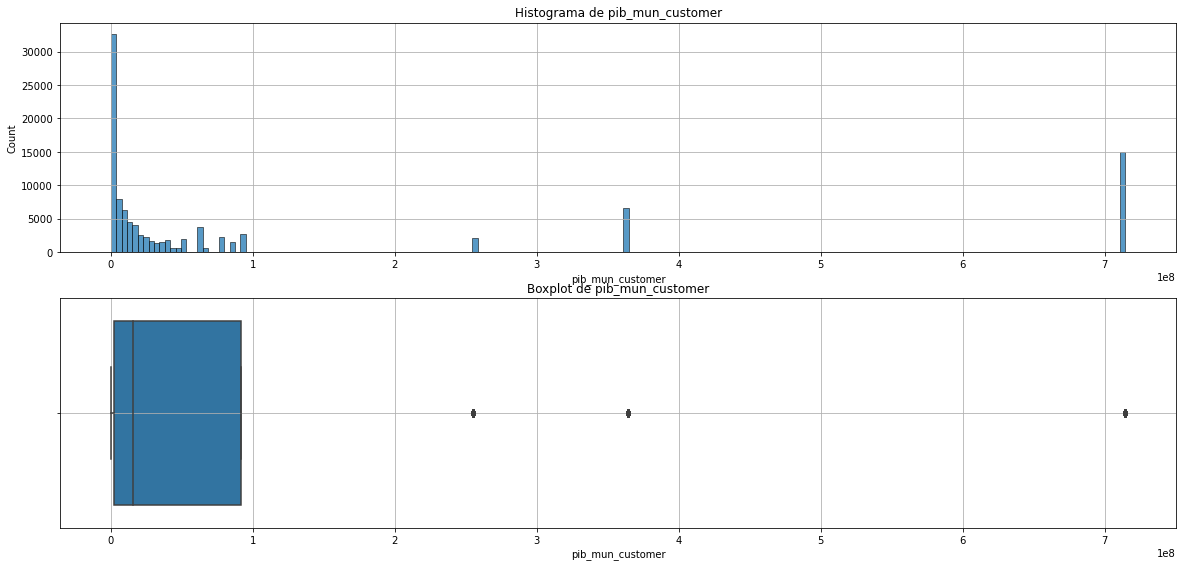

Q0:  17283.019
Q1:  2180556.271
Q3:  91957091.802
Q4:  714683362.463
IQR:  89776535.531
upper_cap:  226621895.0985
lower_cap: -132484247.0255
quantidade de elementos acima do outlier: 23805


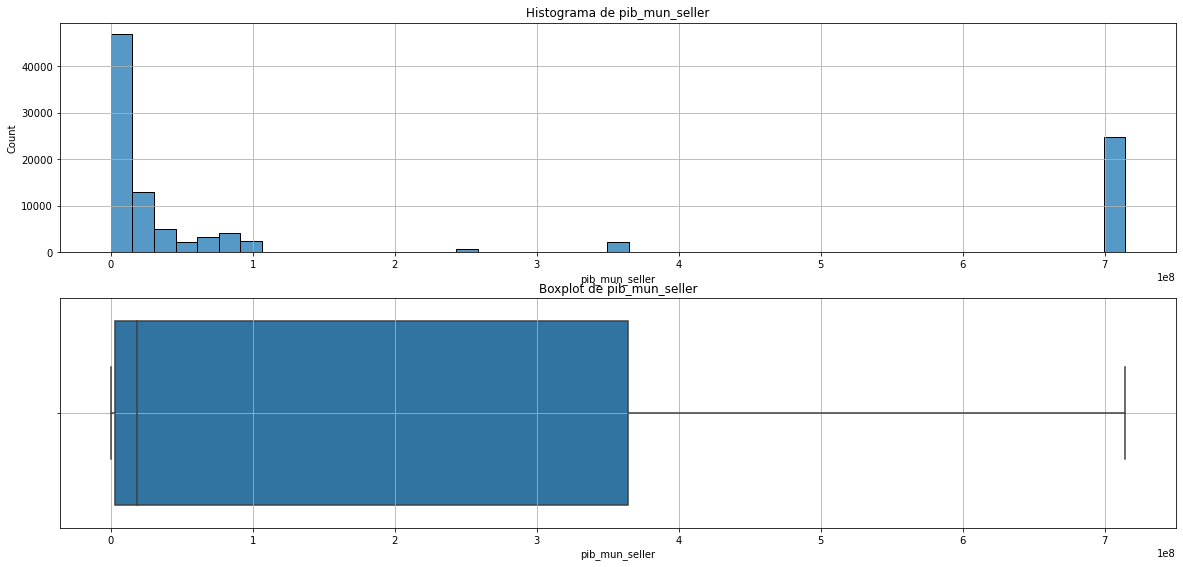

Q0:  17283.019
Q1:  2928687.61
Q3:  364052058.232
Q4:  714683362.463
IQR:  361123370.622
upper_cap:  905737114.165
lower_cap: -538756368.323
quantidade de elementos acima do outlier: 0


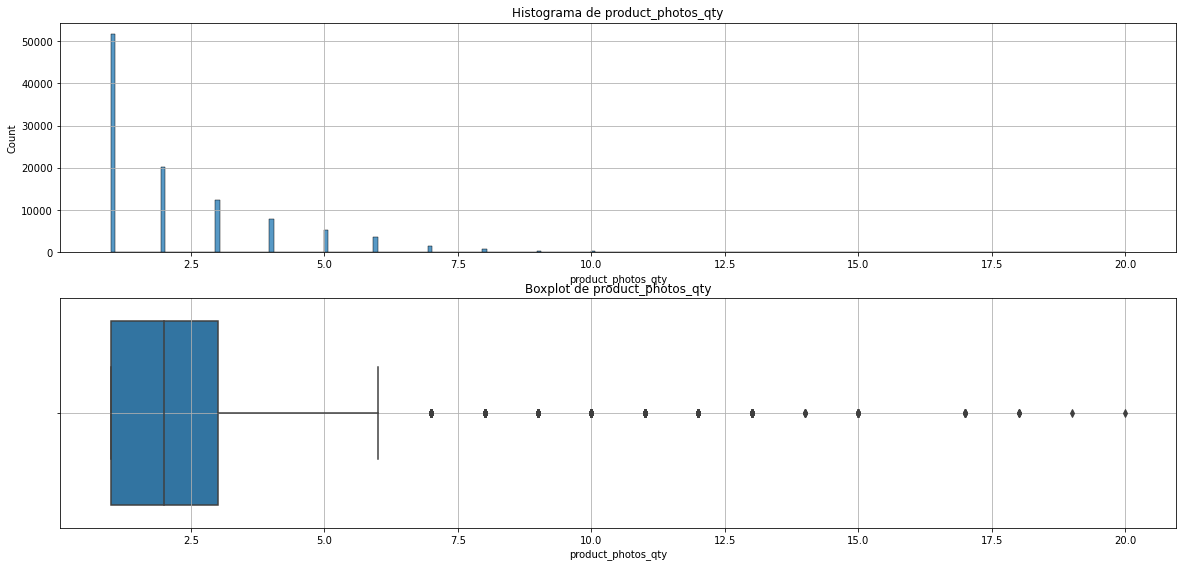

Q0:  1.0
Q1:  1.0
Q3:  3.0
Q4:  20.0
IQR:  2.0
upper_cap:  6.0
lower_cap: -2.0
quantidade de elementos acima do outlier: 3149


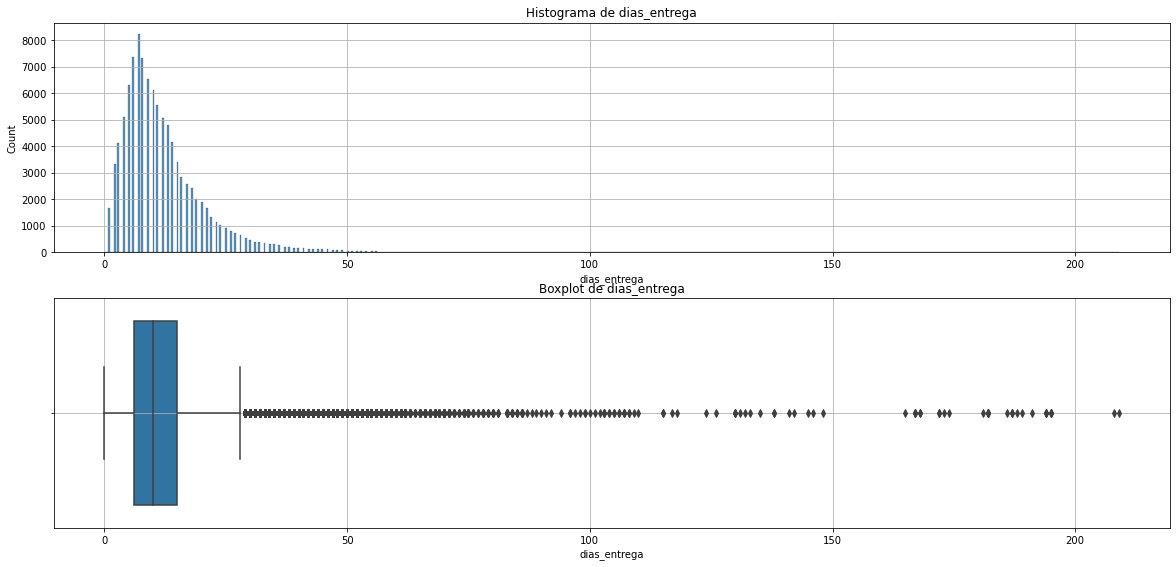

Q0:  0.0
Q1:  6.0
Q3:  15.0
Q4:  209.0
IQR:  9.0
upper_cap:  28.5
lower_cap: -7.5
quantidade de elementos acima do outlier: 5490


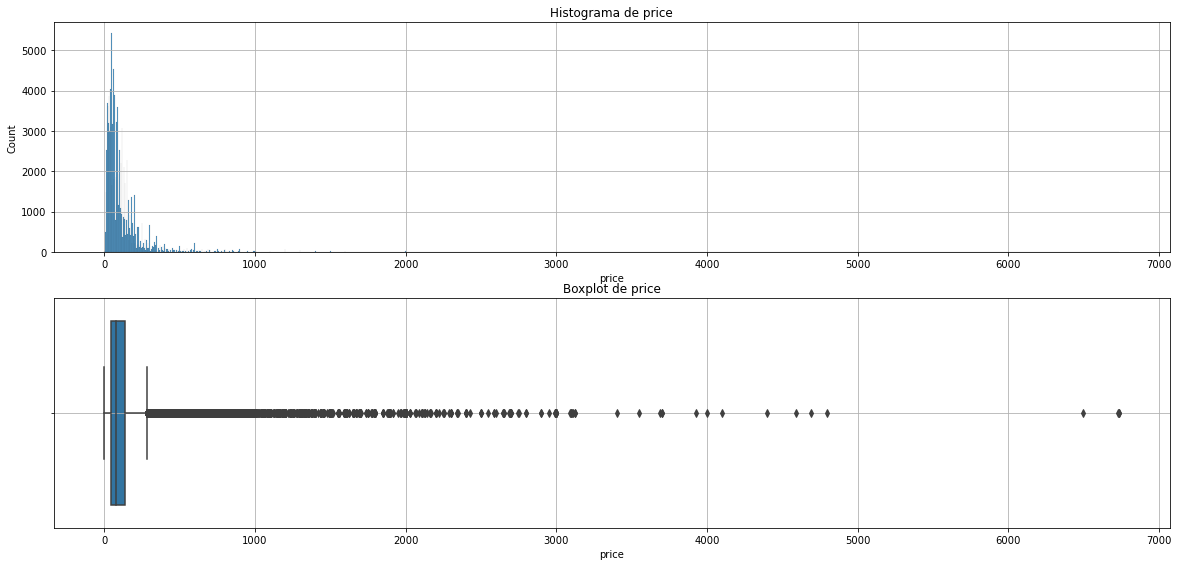

Q0:  0.85
Q1:  42.1
Q3:  139.0
Q4:  6735.0
IQR:  96.9
upper_cap:  284.35
lower_cap: -103.25000000000003
quantidade de elementos acima do outlier: 7860


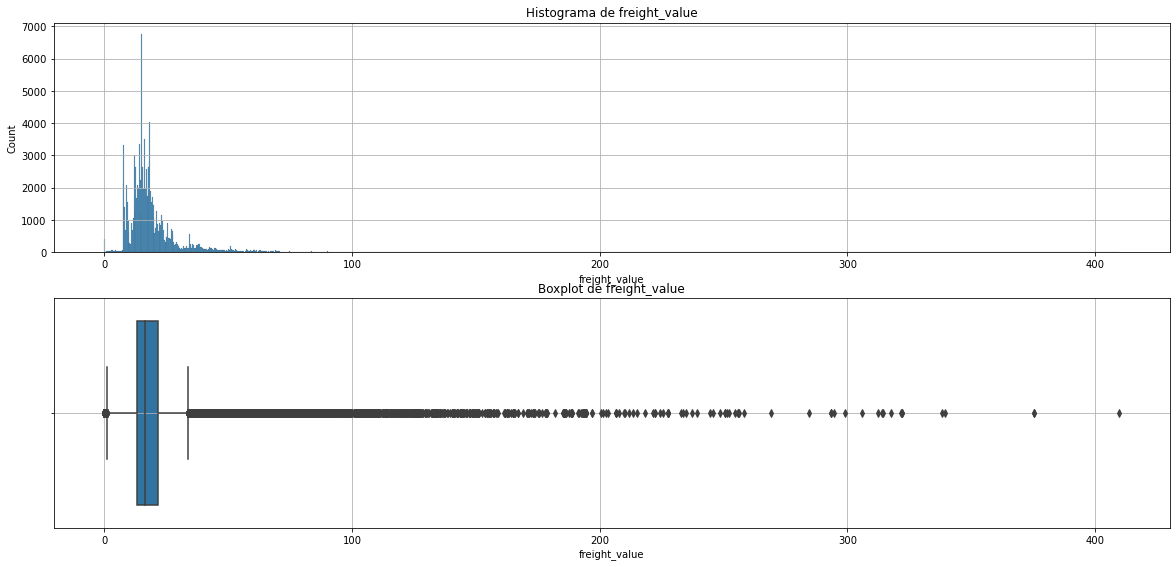

Q0:  0.0
Q1:  13.29
Q3:  21.49
Q4:  409.68
IQR:  8.2
upper_cap:  33.79
lower_cap: 0.9900000000000002
quantidade de elementos acima do outlier: 11041


In [5]:
nrows = len(var_num)*2
ncols = 1
index_num = 0

# fig = plt.figure(figsize=(20,60))
# fig.subplots_adjust(wspace=0.01,hspace=0.4)

for col in var_num:
        
        fig = plt.figure(figsize=(20,60))
        
        index_num = index_num + 1
        if index_num == 13:
            break
        plt.subplot(nrows,ncols,index_num)
        plt.title('Histograma de {}'.format(col))
        plt.xlabel(col)
        sns.histplot(data=df[col])

        plt.grid()

        index_num = index_num + 1
        if index_num == 13:
            break
        plt.subplot(nrows, ncols, index_num)
        plt.title('Boxplot de {}'.format(col))
        plt.xlabel(col)
        sns.boxplot(x=df[col])

        plt.grid()
        
        plt.show()
        
        # cálculo dos outliers
        Q0 = df[col].quantile(0)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        Q4 = df[col].quantile(1)
        IQR = Q3 -Q1
        upper_cap = Q3 + 1.5*IQR
        lower_cap = Q1 - 1.5*IQR
        print('Q0: ',Q0)
        print('Q1: ',Q1)
        print('Q3: ',Q3)
        print('Q4: ',Q4)
        print('IQR: ',IQR)
        print('upper_cap: ',upper_cap)
        print('lower_cap:',lower_cap)
        print('quantidade de elementos acima do outlier:' ,len(df[df[col] > upper_cap]))
    
    


#### 4.1.1. Variáveis Qualitativas

sao paulo         0.143487
rio de janeiro    0.063420
belo horizonte    0.026169
brasilia          0.020700
santo andre       0.015375
curitiba          0.014390
campinas          0.014074
porto alegre      0.013070
belem             0.012019
salvador          0.011388
Name: customer_city, dtype: float64


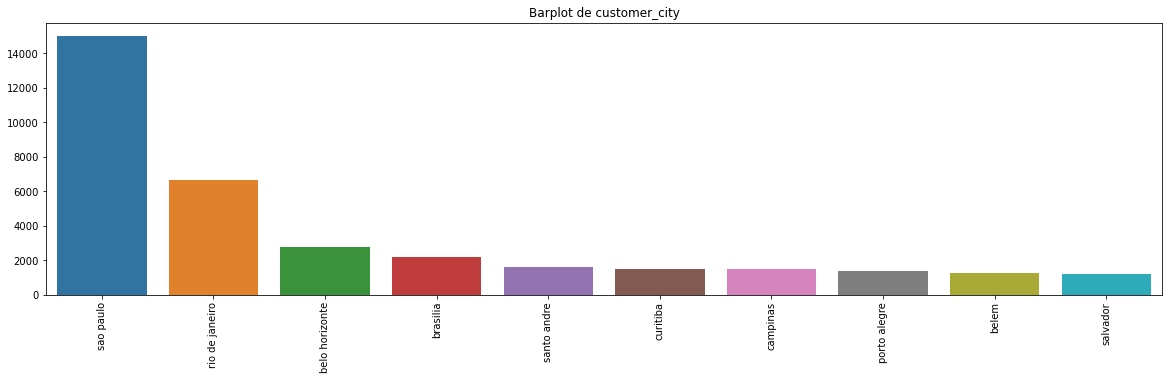

SP    0.392684
RJ    0.120253
MG    0.113895
RS    0.053381
PR    0.050991
SC    0.041926
BA    0.034316
PB    0.021350
DF    0.020700
GO    0.020280
Name: customer_state, dtype: float64


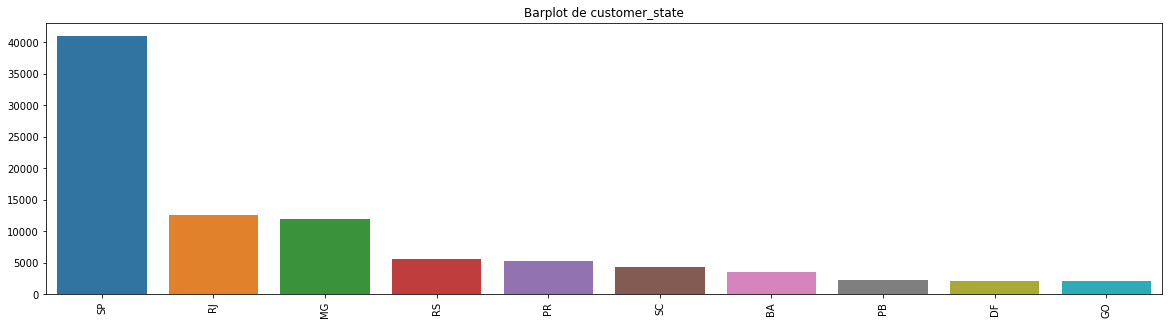

demais servicos                                                                         0.802061
administracao, defesa, educacao e saude publicas e seguridade social                    0.116266
industrias de transformacao                                                             0.035702
agricultura, inclusive apoio a agricultura e a pos colheita                             0.017545
industrias extrativas                                                                   0.013443
comercio e reparacao de veiculos automotores e motocicletas                             0.007448
eletricidade e gas, agua, esgoto, atividades de gestao de residuos e descontaminacao    0.005115
pecuaria, inclusive apoio a pecuaria                                                    0.001702
producao florestal, pesca e aquicultura                                                 0.000612
construcao                                                                              0.000105
Name: atividade_mun_customer, 

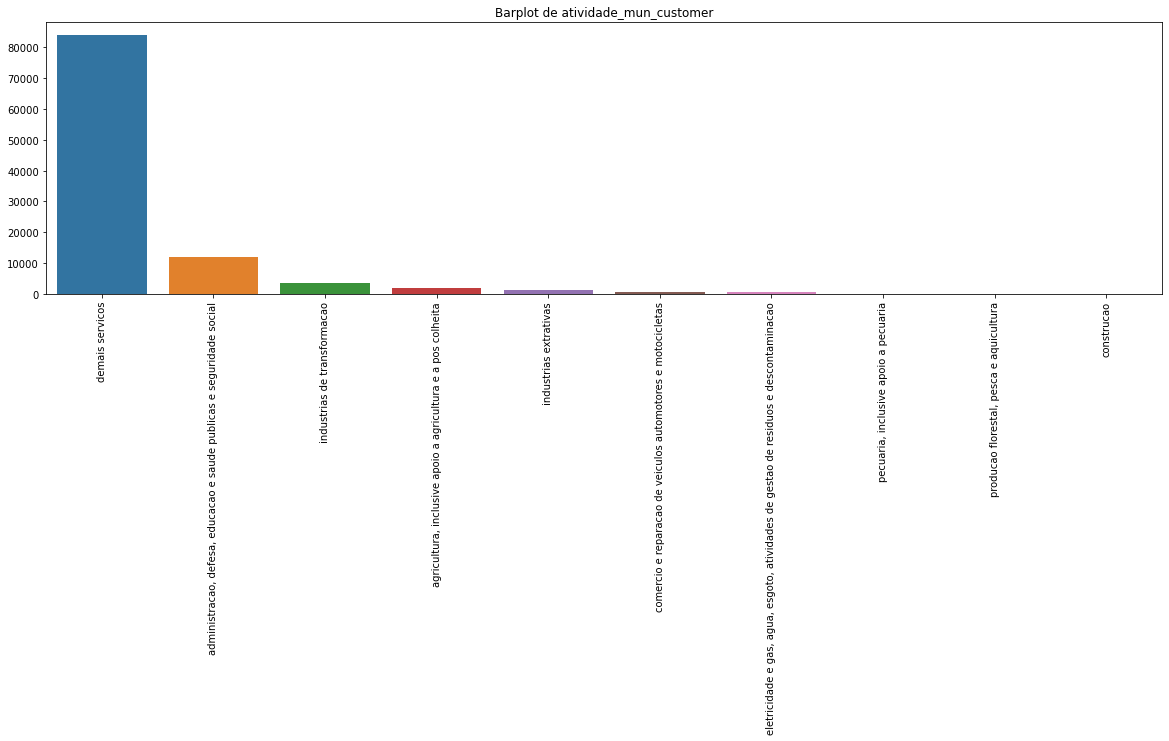

sao paulo                0.237092
ibitinga                 0.066662
santo andre              0.050732
curitiba                 0.026571
praia grande             0.023081
belo horizonte           0.022756
rio de janeiro           0.020385
ribeirao preto           0.019170
sao jose do rio preto    0.018855
maringa                  0.018530
Name: seller_city, dtype: float64


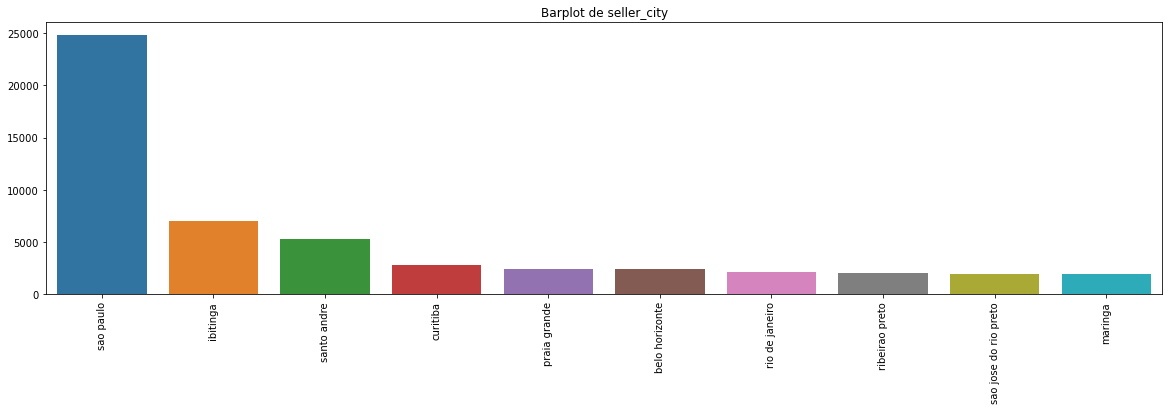

SP    0.659951
MG    0.077829
PR    0.075764
SC    0.050245
RJ    0.043332
PB    0.027173
RS    0.021704
DF    0.007553
CE    0.006310
BA    0.006100
Name: seller_state, dtype: float64


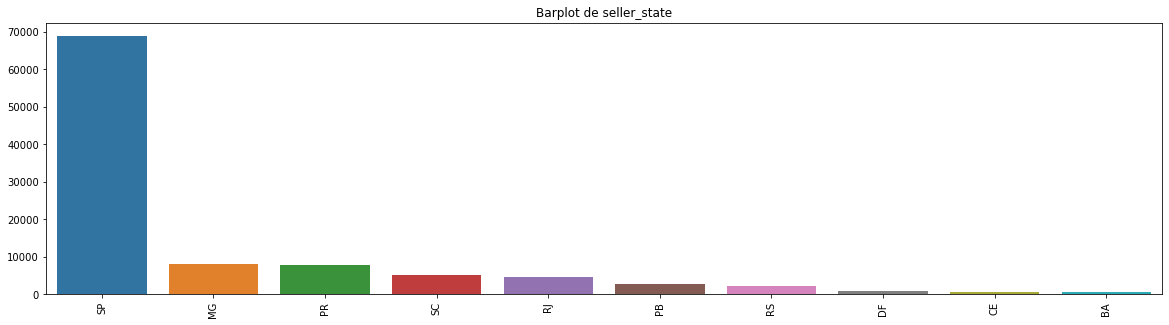

demais servicos                                                                         0.918939
administracao, defesa, educacao e saude publicas e seguridade social                    0.053687
industrias de transformacao                                                             0.016417
comercio e reparacao de veiculos automotores e motocicletas                             0.006043
eletricidade e gas, agua, esgoto, atividades de gestao de residuos e descontaminacao    0.002228
agricultura, inclusive apoio a agricultura e a pos colheita                             0.001979
industrias extrativas                                                                   0.000354
pecuaria, inclusive apoio a pecuaria                                                    0.000354
Name: atividade_mun_seller, dtype: float64


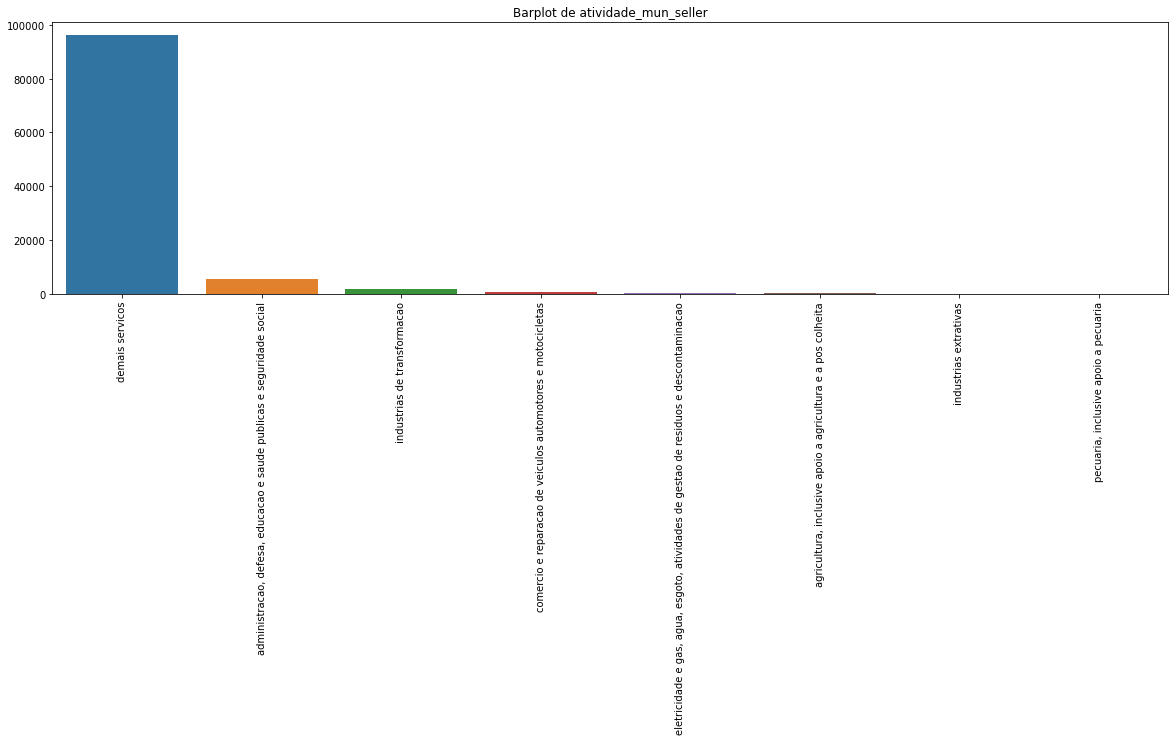

cama_mesa_banho           0.096856
beleza_saude              0.096627
esporte_lazer             0.077762
moveis_decoracao          0.067876
informatica_acessorios    0.067273
utilidades_domesticas     0.057817
relogios_presentes        0.056249
telefonia                 0.040444
automotivo                0.038590
brinquedos                0.037825
Name: product_category_name, dtype: float64


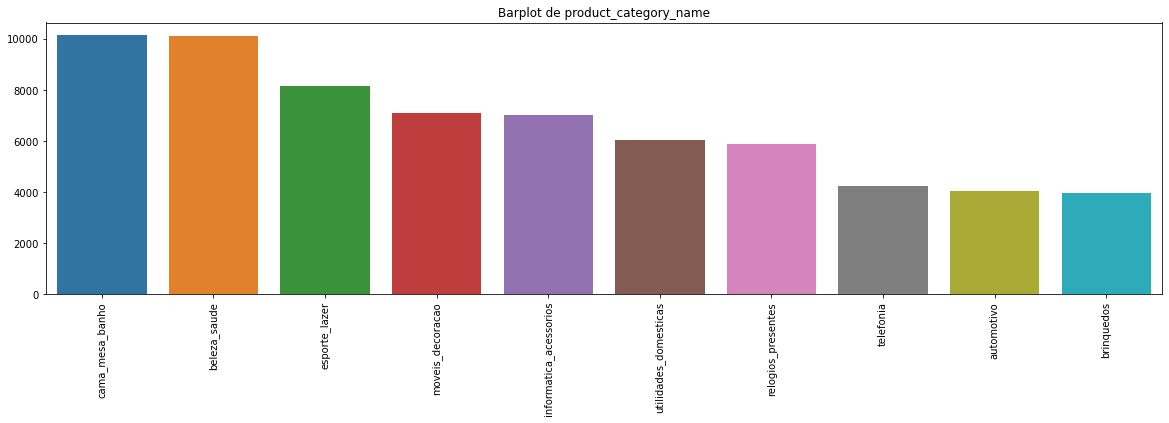

credit_card    0.792404
boleto         0.207596
Name: payment_type, dtype: float64


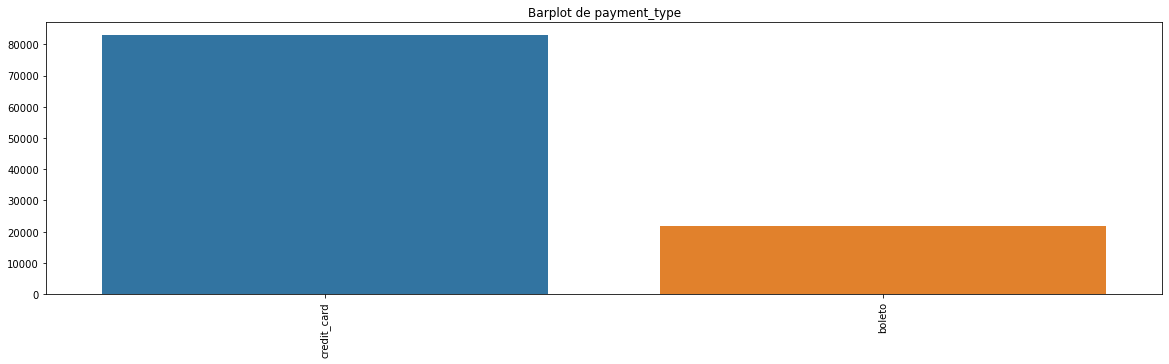

5    0.582495
4    0.195233
1    0.105089
3    0.084541
2    0.032642
Name: review_score, dtype: float64


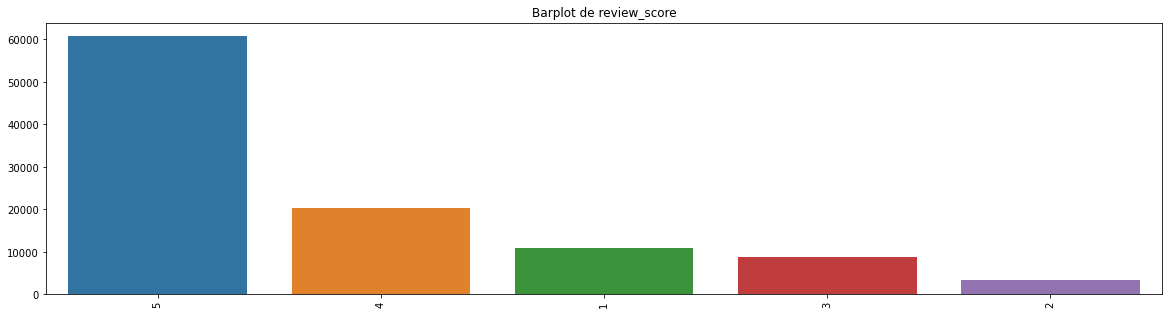

In [6]:
for col in var_cat:
    fig = plt.figure(figsize=(20,5))
    plt.title('Barplot de {}'.format(col))
    plt.xticks(rotation=90)
    df_series = df[col].value_counts().head(10)
    print(df[col].value_counts(normalize=True).head(10))
    sns.barplot(x=df_series.index,y=df_series.values)
    plt.show()

### 4.1.1.1 Conversao de review_score para variavel binaria

In [7]:
# agrupamento dos elementos de review_score

df['review_score'] = df['review_score'].astype(int)
df['review_score'] = df['review_score'].apply(lambda x: 1 if x > 3 else 0)
df['review_score']  = df['review_score'].astype(str)
print(df['review_score'])

0         1
1         1
2         1
3         1
4         1
         ..
104583    1
104584    1
104585    0
104586    1
104587    1
Name: review_score, Length: 104588, dtype: object


1    0.777728
0    0.222272
Name: review_score, dtype: float64


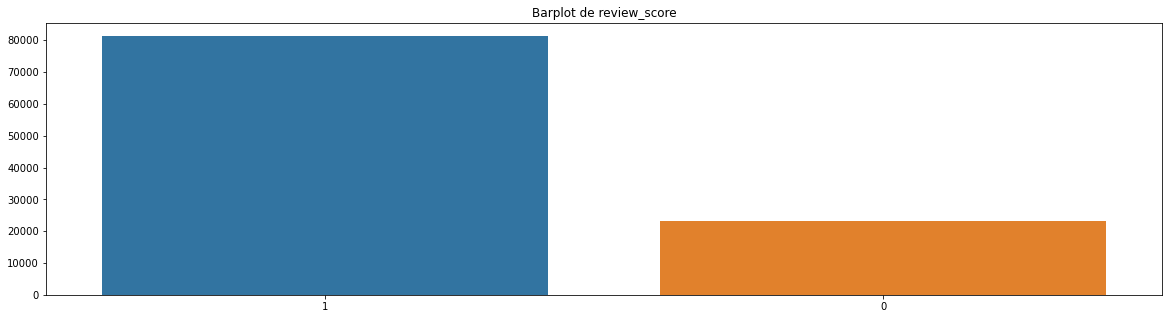

In [8]:
fig = plt.figure(figsize=(20,5))
plt.title('Barplot de {}'.format(col))
df_series = df['review_score'].value_counts().head(10)
print(df['review_score'].value_counts(normalize=True).head(10))
sns.barplot(x=df_series.index,y=df_series.values)
plt.show()

## 4.2 Analise Bivariada

### 4.2.1 Analise Bivariada

### 4.2.1.1 Variáveis Quantitativas com a Variável Resposta

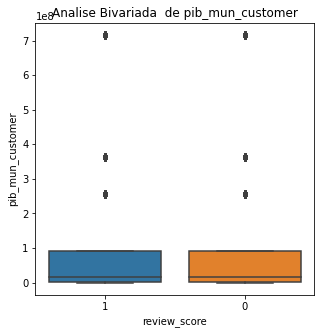

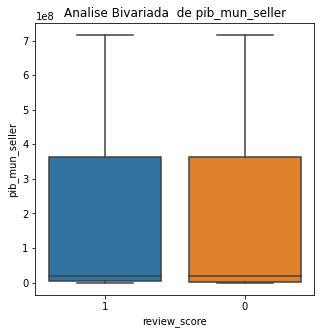

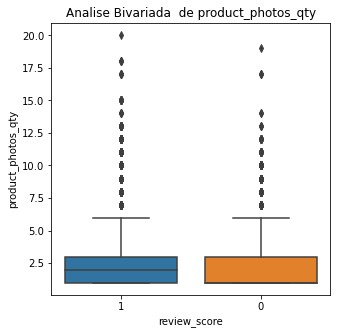

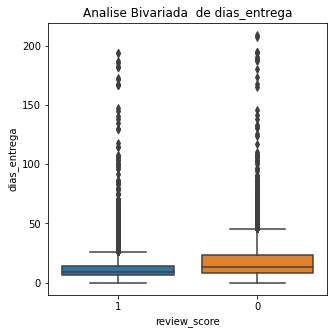

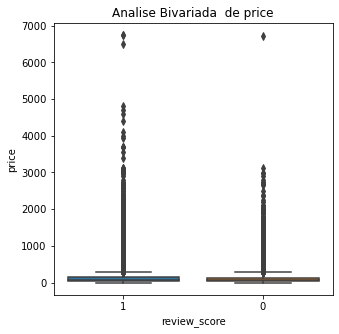

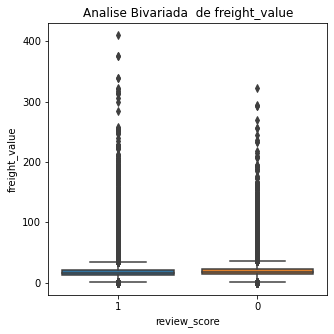

In [9]:
for col in var_num:
    plt.subplots(figsize=(5,5))
    plt.title('Analise Bivariada  de {}'.format(col))
    sns.boxplot(y=df[col], x=df['review_score'])
    plt.show()

#### 4.2.1.1 Variáveis Qualitativa com a Variável Resposta

In [10]:
var_cat:  ['customer_city', 'customer_state', 'atividade_mun_customer', 'seller_city', 'seller_state', 'atividade_mun_seller', 'product_category_name', 'payment_type', 'review_score']

In [11]:
# função para plotar as 10 elementos com maiores numero de negocios realizados

def plota_bivariada_big(campo):
    customer_city_serires = df[campo] .value_counts().head(10)
    # print(customer_city_serires.index)
    df1 = df[df[campo].isin(customer_city_serires.index)]
    fig = plt.figure(figsize=(20,5))
    plt.title('Analise Bivariada  de {}'.format(campo))
    plt.xticks(rotation=90)
    sns.countplot(x=campo, hue="review_score", data=df1)
    plt.show()
    
# funçao que plota os elementos quando não sao muitos

def plota_bivariada_small(campo):
    fig = plt.figure(figsize=(20,5))
    plt.title('Analise Bivariada  de {}'.format(campo))
    sns.countplot(x=campo, hue="review_score", data=df)
    plt.show()

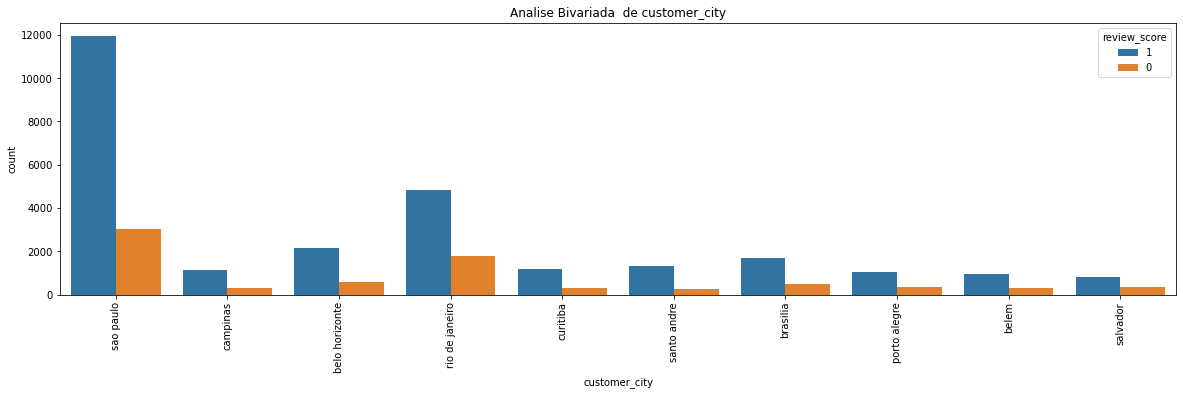

In [12]:
# customer_city

plota_bivariada_big('customer_city')

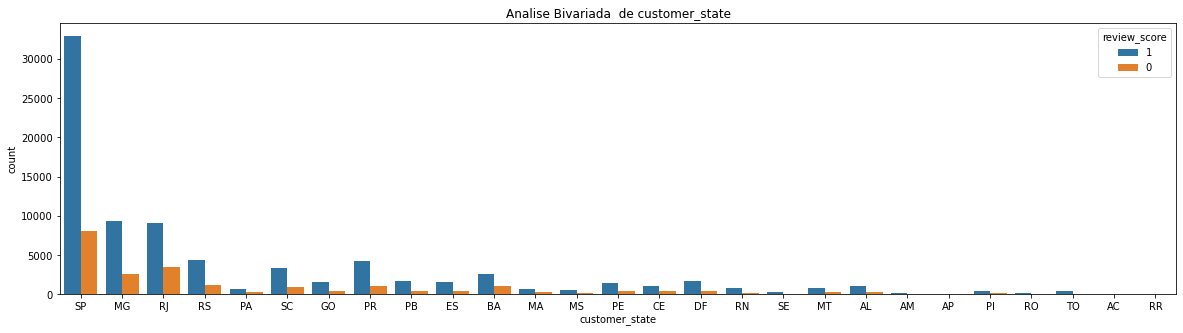

In [13]:
# customer_state

plota_bivariada_small('customer_state')

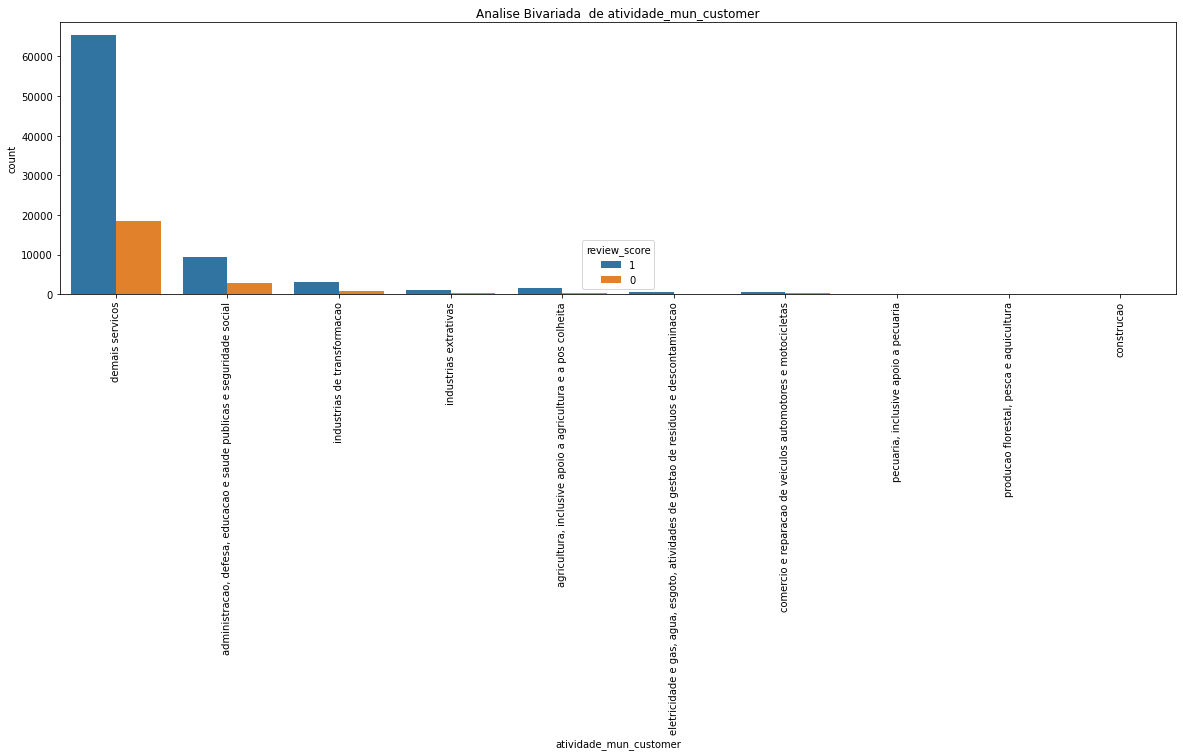

In [14]:
# atividade_mun_customer

plota_bivariada_big('atividade_mun_customer')

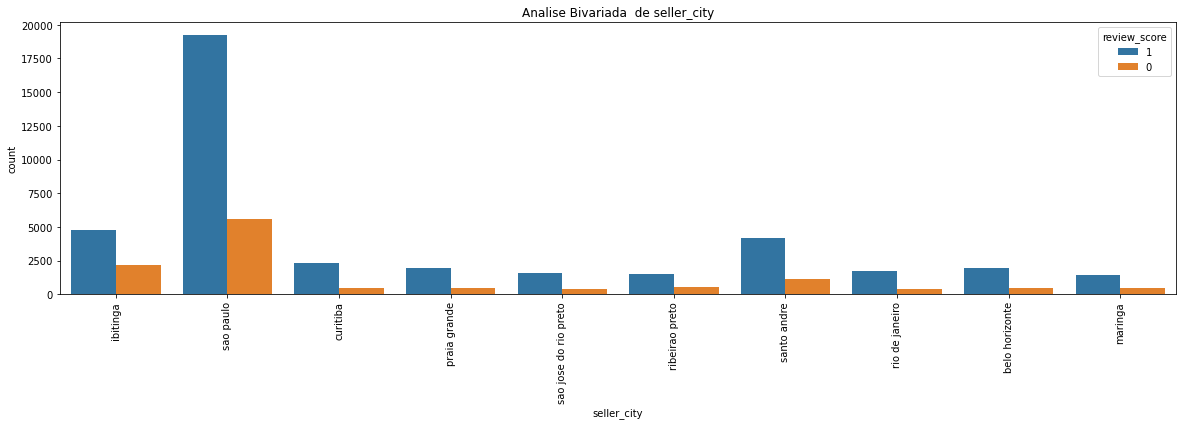

In [15]:
# seller_city 10 maiores

plota_bivariada_big('seller_city')

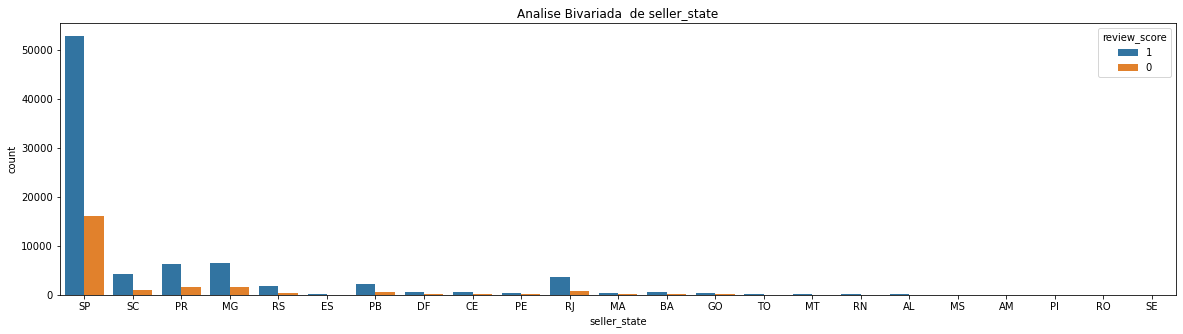

In [16]:
# seller_state

plota_bivariada_small('seller_state')

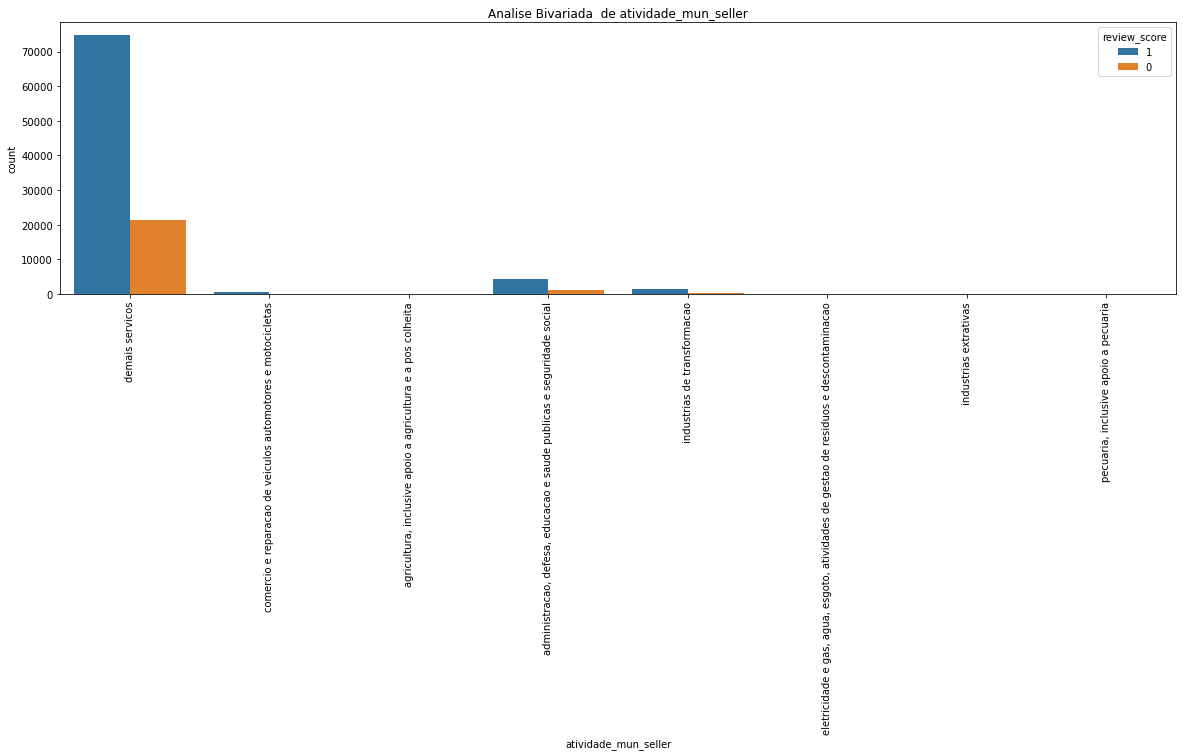

In [17]:
# atividade_mun_seller

plota_bivariada_big('atividade_mun_seller')

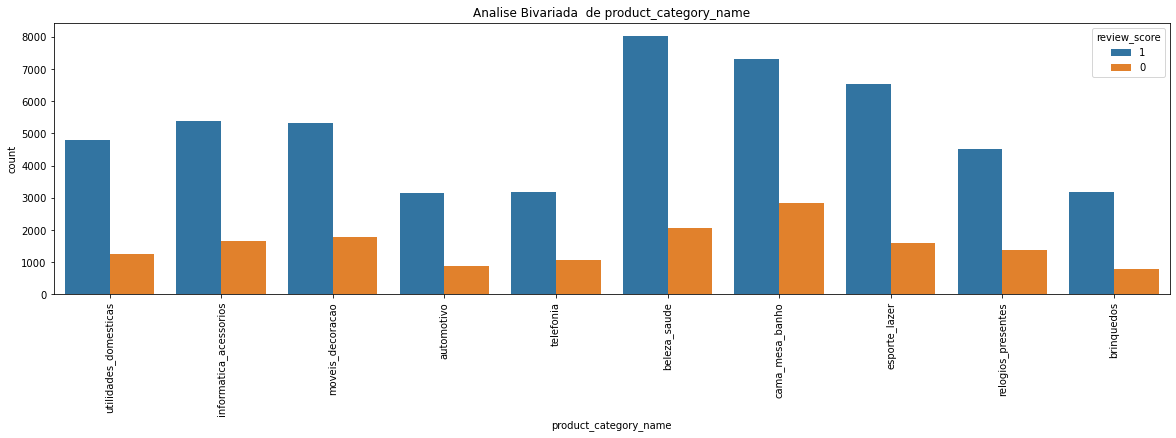

In [18]:
# product_category_name

plota_bivariada_big('product_category_name')

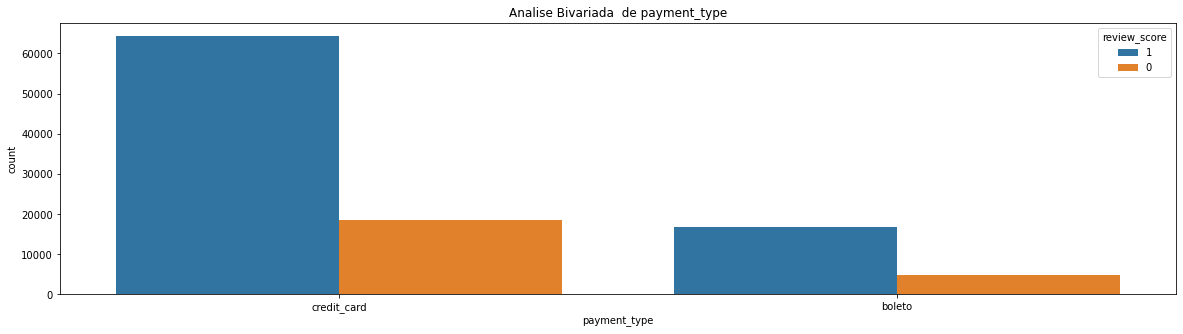

In [19]:
# payment_type

plota_bivariada_small('payment_type')

<AxesSubplot:title={'center':'Matriz de Correlação das Variáveis Nméricas'}>

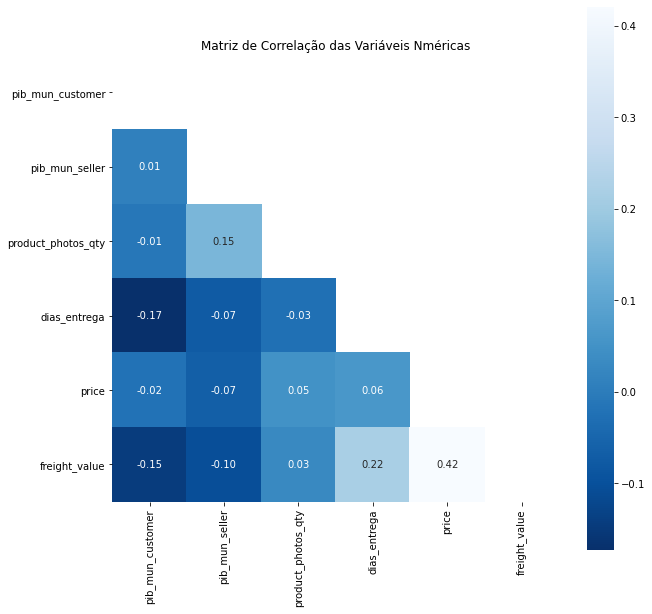

In [20]:
# matriz de correlação

fig = plt.figure(figsize=(10,10))

df_num_corr = df.corr()

mask_triu = np.triu(df_num_corr,k=0)

plt.title('Matriz de Correlação das Variáveis Nméricas')
sns.heatmap(df_num_corr, annot=True, fmt='.2f', square=True, cmap = 'Blues_r', mask=mask_triu)


In [21]:
# path_csv_ml = 'd:/tcc_puc_minas/dataframe_final/df_ml.csv'

# df.to_csv(path_csv_ml,sep='|',index=False,header=True)